In [1]:
from matplotlib import pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import os.path as op
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal
from scipy.fft import fftshift
from bids import BIDSLayout

In [10]:
fs = 1200

In [87]:
def read_epochs(sub, desc):
    '''
    reads and concatenates epochs across runs
    '''
    layout = BIDSLayout(BIDS_ROOT, derivatives = True)
    run = lambda f: int(re.findall('run-(\w+)_', f)[0])
    fnames = layout.get(
        return_type = 'filename',
        subject = sub, 
        desc = desc
        )
    print(fnames)
    fnames.sort(key = run)
    epochs_all = [mne.read_epochs(f) for f in fnames]
    epochs = mne.concatenate_epochs(epochs_all)
    epochs = epochs.pick('eeg')
    return epochs

def compute_power_dB(evokeds):
    poststim = evokeds.compute_psd(tmin = 0., tmax = 0.2)
    baseline = evokeds.compute_psd(tmin = -0.2, tmax = 0.)
    power = 10 * np.log10(poststim.get_data() / baseline.get_data())
    power = np.squeeze(power)
    freqs = poststim.freqs
    return freqs, power

def plot_psd_dB(freqs, power, stim_freq):
    plt.plot(freqs, power, label = str(stim_freq))
    plt.xlabel('frequency')
    plt.ylabel('dB')
    plt.xlim(0, 600)
    plt.ylim(0, 20)
    plt.axvline(stim_freq, linestyle = '--', color = 'grey')
    plt.axvline(stim_freq*2, linestyle = 'dotted', color = 'grey')
    plt.legend(title = 'Stim frequency (Hz)')
    
def compute_power_fft(fs, evokeds):
    x = evokeds.get_data()
    x = x.flatten()
    time_step = 1 / fs
    freqs = np.fft.fftfreq(x.size, time_step)
    idx = np.argsort(freqs)
    ps = np.abs(np.fft.fft(x))**2
    return freqs, ps, idx

def plot_psd_fft(freqs, ps, idx, stim_freq):
    plt.plot(freqs[idx], ps[idx], label = "280")
    plt.legend(title = 'Stim frequency (Hz)')
    plt.xlabel("Hz")
    plt.ylabel("PSD (V^2/Hz)")
    plt.xlim(0, 600)
    plt.axvline(stim_freq, linestyle = '--', color = 'grey')
    plt.axvline(stim_freq*2, linestyle = 'dotted', color = 'grey')

In [48]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess_ffr')
subs.sort(key = int)
epochs = []

for sub in subs:
    if epochs == []:
        epochs = read_epochs(sub, 'forFFR')
    sub_epochs = read_epochs(sub, 'forFFR')
    epochs = mne.concatenate_epochs([epochs, sub_epochs])

['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3342 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3342 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3342 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3342 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
6684 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3328 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3328 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
10012 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3284 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3284 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
13296 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3954 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3954 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
17250 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3478 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3478 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
20728 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3226 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3226 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
23954 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2616 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2616 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
26570 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
1373 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1373 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
27943 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3716 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3716 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
31659 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3196 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3196 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
34855 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3996 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3996 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
38851 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-24/sub-24_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-24/sub-24_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4051 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4051 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
42902 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-25/sub-25_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-25/sub-25_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3719 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3719 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
46621 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-26/sub-26_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-26/sub-26_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3339 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3339 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
49960 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3027 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3027 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
52987 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2504 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2504 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
55491 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
624 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
624 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
56115 matching events found
Applying baseline correction (mode: mean)


In [51]:
epochs.info

<Info | 15 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: True
 description: Anonymized using a time shift to preserve age at acquisition
 dig: 67 items (3 Cardinal, 64 EEG)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 100.0 Hz
 line_freq: 60.0
 lowpass: 600.0 Hz
 meas_date: 1924-12-31 11:16:36 UTC
 meas_id: 4 items (dict)
 nchan: 1
 projs: []
 sfreq: 1200.0 Hz
 subject_info: 3 items (dict)
>

In [98]:
# Compute grand average 
evokeds = {}
evokeds['130'] = epochs['11', '21', '31'].average()
evokeds['200'] = epochs['12', '22', '32'].average()
evokeds['280'] = epochs['31', '32', '33'].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


#### Compute grand average fft for each tone (in dB)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


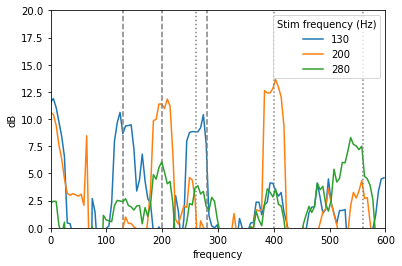

In [99]:
freqs, power = compute_power_dB(evokeds['130'])
plot_psd_dB(freqs, power, 130)
freqs, power = compute_power_dB(evokeds['200'])
plot_psd_dB(freqs, power, 200)
freqs, power = compute_power_dB(evokeds['280'])
plot_psd_dB(freqs, power, 280)
plt.show()

#### Compute grand average fft for each tone (with np.fft())

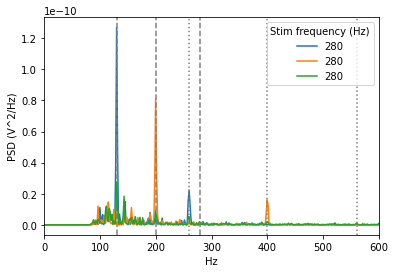

In [100]:
freqs, ps, idx = compute_power_fft(fs, evokeds['130'])
plot_psd_fft(freqs, ps, idx, 130)
freqs, ps, idx = compute_power_fft(fs, evokeds['200'])
plot_psd_fft(freqs, ps, idx, 200)
freqs, ps, idx = compute_power_fft(fs, evokeds['280'])
plot_psd_fft(freqs, ps, idx, 280)
plt.show()

### Plot PSD for each sub

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3342 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3342 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

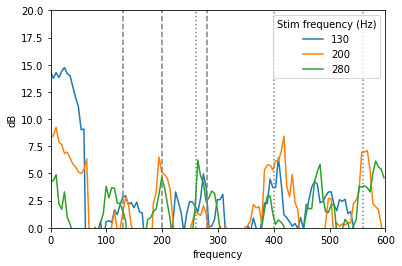

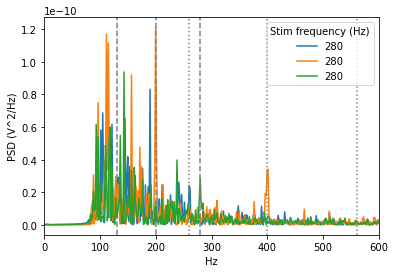

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3328 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3328 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

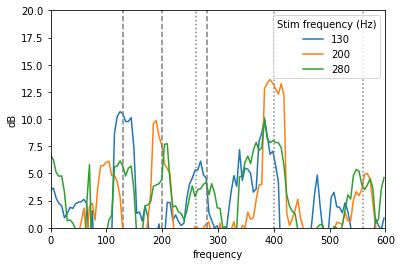

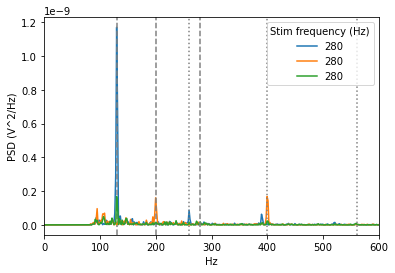

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3284 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3284 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

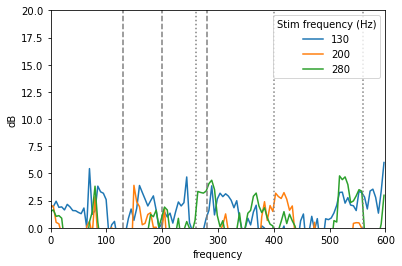

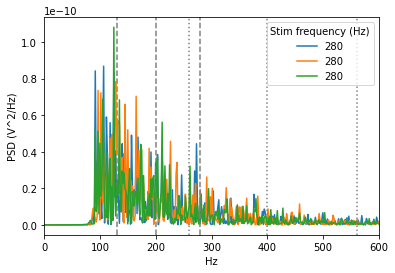

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3954 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3954 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

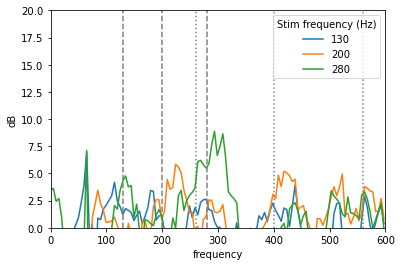

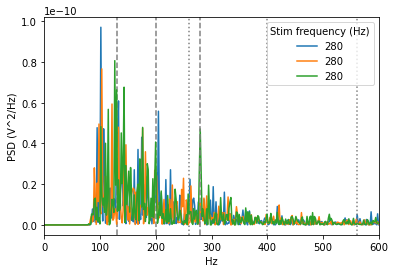

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3478 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3478 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

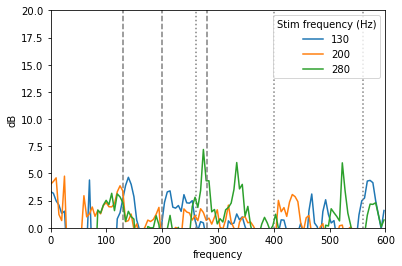

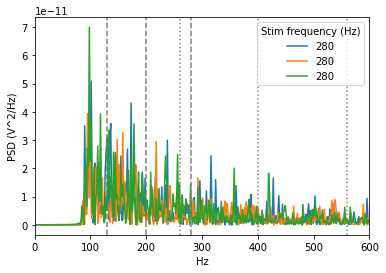

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3226 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3226 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

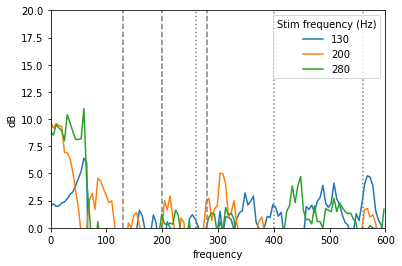

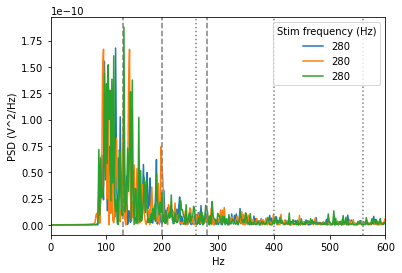

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2616 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2616 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

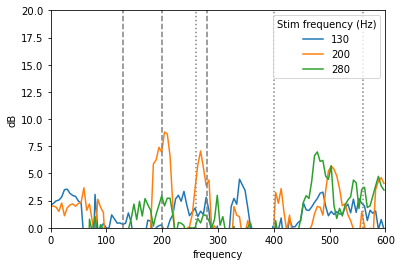

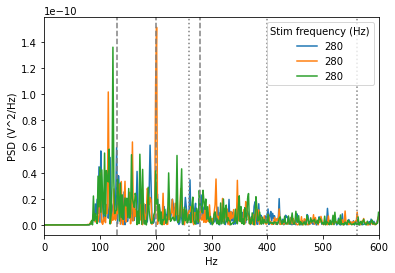

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
1373 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1373 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

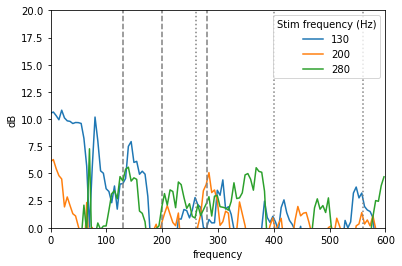

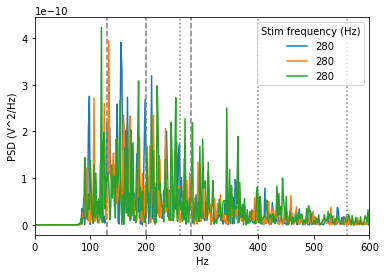

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3716 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3716 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

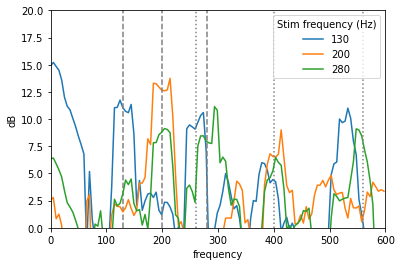

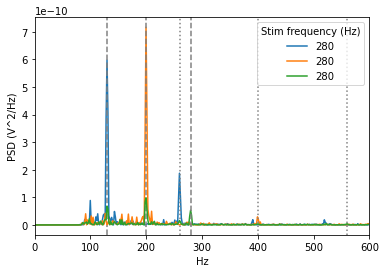

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3196 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3196 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

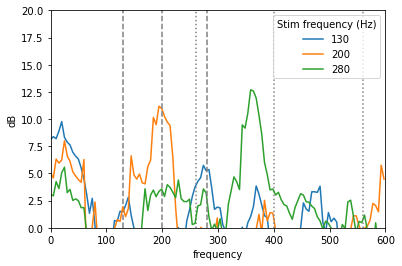

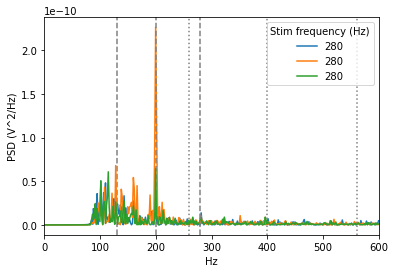

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3996 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3996 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

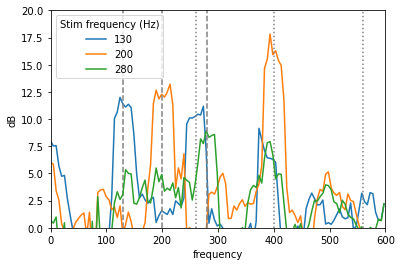

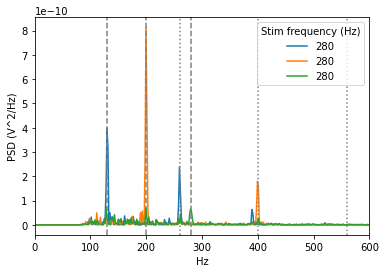

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-24/sub-24_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-24/sub-24_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4051 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4051 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

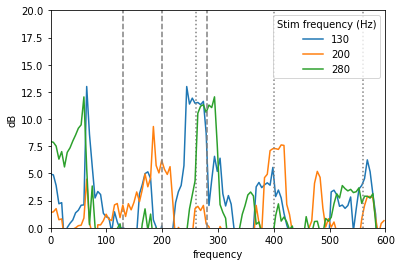

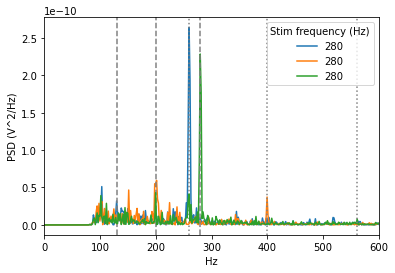

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-25/sub-25_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-25/sub-25_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3719 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3719 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

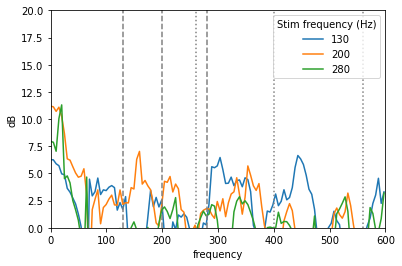

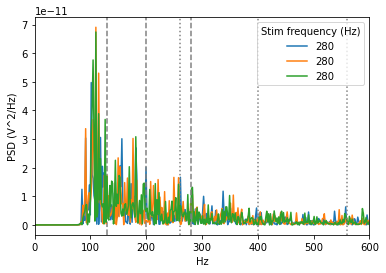

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-26/sub-26_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-26/sub-26_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3339 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3339 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

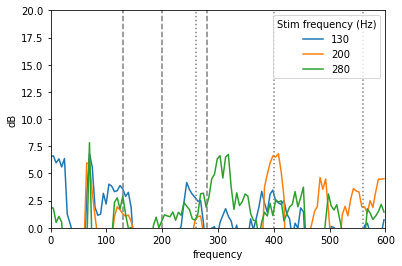

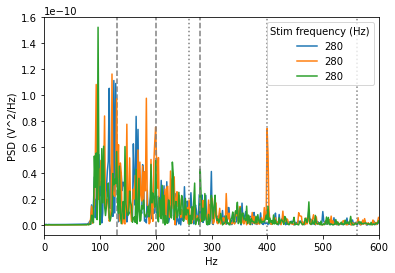

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3027 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3027 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

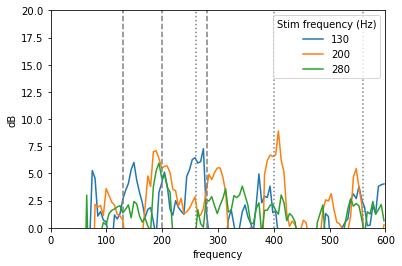

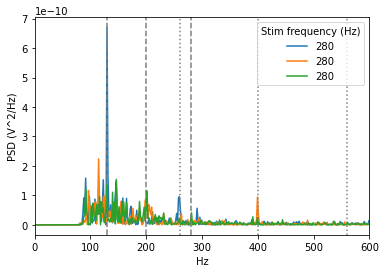

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2504 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2504 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitape

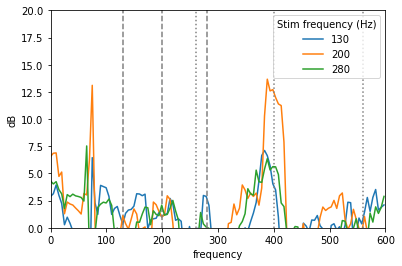

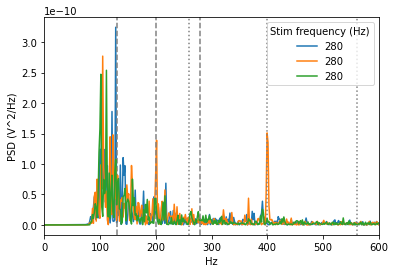

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
624 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
624 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper 

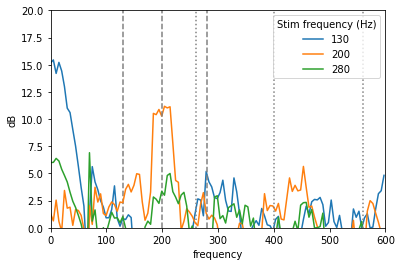

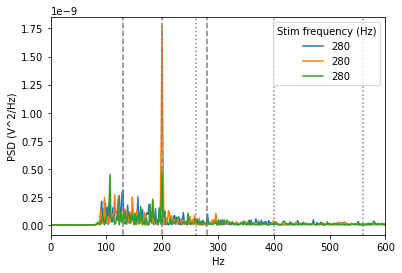

In [92]:
for sub in subs:
    sub_epochs = read_epochs(sub, 'forFFR')
    sub_evokeds = {}
    sub_evokeds['130'] = sub_epochs['11', '21', '31'].average()
    sub_evokeds['200'] = sub_epochs['12', '22', '32'].average()
    sub_evokeds['280'] = sub_epochs['31', '32', '33'].average()
    
    # PSD in dB
    freqs, power = compute_power_dB(sub_evokeds['130'])
    plot_psd_dB(freqs, power, 130)
    freqs, power = compute_power_dB(sub_evokeds['200'])
    plot_psd_dB(freqs, power, 200)
    freqs, power = compute_power_dB(sub_evokeds['280'])
    plot_psd_dB(freqs, power, 280)
    plt.show()
    
    # PSD with np.fft()
    freqs, ps, idx = compute_power_fft(fs, sub_evokeds['130'])
    plot_psd_fft(freqs, ps, idx, 130)
    freqs, ps, idx = compute_power_fft(fs, sub_evokeds['200'])
    plot_psd_fft(freqs, ps, idx, 200)
    freqs, ps, idx = compute_power_fft(fs, sub_evokeds['280'])
    plot_psd_fft(freqs, ps, idx, 280)
    plt.show()



### Look at FFR by target tone identity (with np.fft())

In [93]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess_ffr')
subs.sort(key = int)
epochs = []

for sub in subs:
    if sub in ['12', '14', '15', '16', '20', '24', '25', '26']:
        continue
    if epochs == []:
        epochs = read_epochs(sub, 'forFFR')
    sub_epochs = read_epochs(sub, 'forFFR')
    epochs = mne.concatenate_epochs([epochs, sub_epochs])

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3342 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3342 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3342 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3342 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
6684 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3328 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3328 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
10012 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2616 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2616 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
12628 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3716 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3716 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
16344 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3196 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3196 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
19540 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3996 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3996 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
23536 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3027 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3027 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
26563 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2504 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2504 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
29067 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
624 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
624 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
29691 matching events found
Applying baseline correction (mode: mean)


In [103]:
# Look at FFR by target tone identity
conditions = list(epochs.event_id.keys())
evokeds = {c:epochs[c].average() for c in conditions}

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


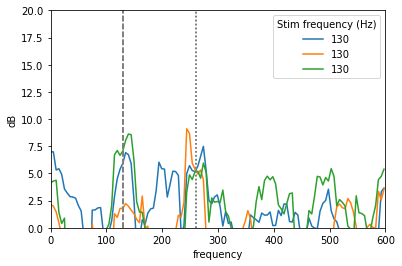

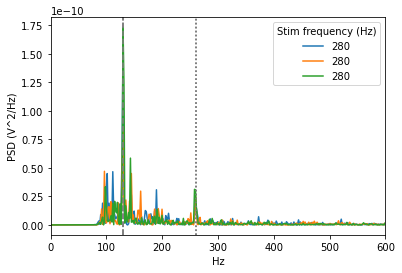

In [105]:
# ffr for 130 Hz tone at different target conditions
freqs, power = compute_power_dB(evokeds['11'])
plot_psd_dB(freqs, power, 130)
freqs, power = compute_power_dB(evokeds['21'])
plot_psd_dB(freqs, power, 130)
freqs, power = compute_power_dB(evokeds['31'])
plot_psd_dB(freqs, power, 130)
plt.show()

freqs, ps, idx = compute_power_fft(fs, evokeds['11'])
plot_psd_fft(freqs, ps, idx, 130)
freqs, ps, idx = compute_power_fft(fs, evokeds['21'])
plot_psd_fft(freqs, ps, idx, 130)
freqs, ps, idx = compute_power_fft(fs, evokeds['31'])
plot_psd_fft(freqs, ps, idx, 130)
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


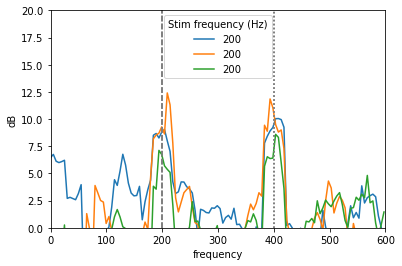

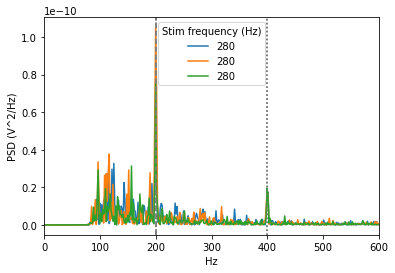

In [107]:
# ffr for 200 Hz tone at different target conditions
freqs, power = compute_power_dB(evokeds['12'])
plot_psd_dB(freqs, power, 200)
freqs, power = compute_power_dB(evokeds['22'])
plot_psd_dB(freqs, power, 200)
freqs, power = compute_power_dB(evokeds['32'])
plot_psd_dB(freqs, power, 200)
plt.show()

freqs, ps, idx = compute_power_fft(fs, evokeds['12'])
plot_psd_fft(freqs, ps, idx, 200)
freqs, ps, idx = compute_power_fft(fs, evokeds['22'])
plot_psd_fft(freqs, ps, idx, 200)
freqs, ps, idx = compute_power_fft(fs, evokeds['32'])
plot_psd_fft(freqs, ps, idx, 200)
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


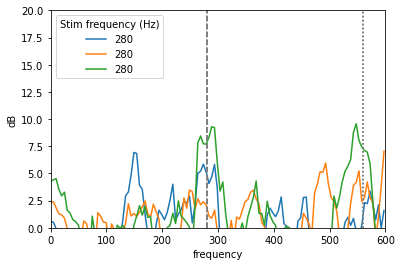

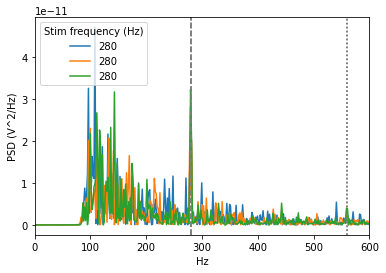

In [108]:
# ffr for 280 Hz tone at different target conditions
freqs, power = compute_power_dB(evokeds['13'])
plot_psd_dB(freqs, power, 280)
freqs, power = compute_power_dB(evokeds['23'])
plot_psd_dB(freqs, power, 280)
freqs, power = compute_power_dB(evokeds['33'])
plot_psd_dB(freqs, power, 280)
plt.show()

freqs, ps, idx = compute_power_fft(fs, evokeds['13'])
plot_psd_fft(freqs, ps, idx, 280)
freqs, ps, idx = compute_power_fft(fs, evokeds['23'])
plot_psd_fft(freqs, ps, idx, 280)
freqs, ps, idx = compute_power_fft(fs, evokeds['33'])
plot_psd_fft(freqs, ps, idx, 280)
plt.show()

### Compute and save FFR by target tone identity (by dB)